Задание 11

f(x) =(sin(x)/2 + cos(x)/2)2 * sin(x) - это для тех, кто хочет сложное уравнение
f(x) = x2 - 6*abs(x) + 8 - это полегче.

Ответы давайте не из личных наблюдений, а стараясь подойти к этому с позиции "Пейн, я корни не вижу!"

Определить корни

Найти интервалы, на которых функция возрастает

Найти интервалы, на которых функция убывает

Построить график

Вычислить вершину

Определить промежутки, на котором f > 0

Определить промежутки, на котором f < 0

P.S. Используйте презентацию, она ждет вас в обсуждениях к этому семинару. Функции, что я там советую, поглядите в документации. Там есть примеры использования и что они точно значат.

P.P.S. Запустите код в каждом окошке Jupiter Notebook, сохраните файл, добавьте в свой гит-репозиторий и отправьте мне ссылку:)

Дам подсказку по поводу уравнения с модулями:https://cloud.prezentacii.org/19/03/137842/images/screen8.jpg

In [407]:
import sympy
from sympy import *
from sympy import Symbol
from sympy.parsing.sympy_parser import parse_expr
from sympy.plotting.intervalmath import interval

from sympy.utilities.lambdify import implemented_function
from sympy import lambdify

import pprint

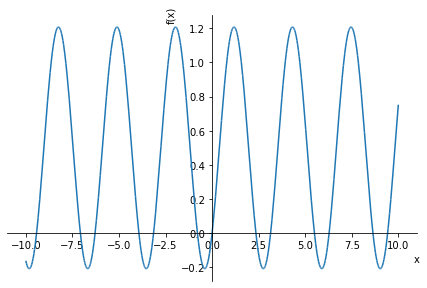

In [408]:
x = Symbol('x')
f = (sympy.sin(x)/2 + sympy.cos(x)/2)*2 * sympy.sin(x)
funct = Lambda((x), f)
sympy.plot(f)

Нахождение интервала

Минимум функции

In [409]:
lower_bound = -0.4
upper_bound = 0

zeros = solveset(f, x, domain=Interval(lower_bound, upper_bound))
assert zeros.is_FiniteSet
res_min = Min(f.subs(x, lower_bound), f.subs(x, upper_bound), *[f.subs(x, i) for i in zeros])
res_max = Max(f.subs(x, lower_bound), f.subs(x, upper_bound), *[f.subs(x, i) for i in zeros])
res_min, res_max

(-0.207031400123344, 0)

In [410]:
Минимум функции

SyntaxError: invalid syntax (<ipython-input-410-d534d28a68d6>, line 1)

In [411]:
lower_bound = 0
upper_bound = 1.5

zeros = solveset(f, x, domain=Interval(lower_bound, upper_bound))
assert zeros.is_FiniteSet
res_min_ = Min(f.subs(x, lower_bound), f.subs(x, upper_bound), *[f.subs(x, i) for i in zeros])
res_max_ = Max(f.subs(x, lower_bound), f.subs(x, upper_bound), *[f.subs(x, i) for i in zeros])
res_min_, res_max_.evalf()

(0, 1.06555625233016)

Все точки интервала

In [412]:
points = [res_min, res_max_, (abs(res_min) + abs(res_max_))*2]
points

[-0.207031400123344, 1.06555625233016, 2.54517530490700]

Определение интервалов

In [413]:
points[-1] - points[0]

2.75220670503034

In [414]:
interv = points.copy()

In [415]:
interv.append(0)
interv.sort()
interv.append(interv[-1] + interv[0])
interv.sort()
interv

[-0.207031400123344, 0, 1.06555625233016, 2.33814390478366, 2.54517530490700]

Направление интерваова графика

In [416]:
def chackInterval(f, interval):
        if is_increasing(f, Interval(interval[0], interval[1]) if interval[0] < 0 or interval[1] < 0 else Interval(interval[1], interval[0])):
            return 'Возростает'
        else:
            return 'Убывает'

In [417]:
sympy.Float(points[0])

-0.207031400123344

In [418]:
intervals = {'Возростает':[], 'Убывает':[], 'Неизменна':[]}

intervals[chackInterval(f, (points[0] * 0.99995, points[0]))].append((-oo, points[0]))
for idx, _ in enumerate(points):
    if idx < len(points) - 1:
        intervals[chackInterval(f, (sympy.Float(points[idx+1]), sympy.Float(points[idx])))].append((sympy.Float(points[idx+1]), sympy.Float(points[idx])))
intervals[chackInterval(f, (points[-1] / 0.99995, points[-1]))].append((oo, points[-1]))

In [419]:
intervals

{'Возростает': [(-oo, -0.207031400123344),
  (1.06555625233016, -0.207031400123344)],
 'Убывает': [(2.54517530490700, 1.06555625233016), (oo, 2.54517530490700)],
 'Неизменна': []}

In [420]:
points = [Float(e) for e in points]
points.append(oo)
points.insert(0, -oo)
points

[-oo, -0.207031400123344, 1.06555625233016, 2.54517530490700, oo]

Нахождение вершины графика

In [421]:
for idx, point in enumerate(points):
    if 0 < idx < len(points) - 1:
        if ((points[idx-1], points[idx]) in intervals['Возростает'] or (points[idx], points[idx-1]) in intervals['Возростает']) and ((points[idx], points[idx+1]) in intervals['Убывает'] or (points[idx+1], points[idx]) in intervals['Убывает']):
            print(f'Вершина графика {point}')

Вершина графика 1.06555625233016


Знак функции

In [423]:
for idx, point in enumerate(interv):
    if idx < len(interv) - 1:
        print(f'На промежутке ({interv[idx]}, {interv[idx+1]}) \t функция {"f < 0" if (funct(interv[idx]).n() + funct(interv[idx+1]).n()) / 2 > 0 else "f > 0"}')

На промежутке (-0.207031400123344, 0) 	 функция f > 0
На промежутке (0, 1.06555625233016) 	 функция f < 0
На промежутке (1.06555625233016, 2.33814390478366) 	 функция f < 0
На промежутке (2.33814390478366, 2.54517530490700) 	 функция f > 0
